### 이상치

In [1]:
import pandas as pd

In [4]:
exam = pd.read_excel("excel_exam.xlsx")
exam[:5]

,id,class,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [5]:
exam.rename({'class' : 'nclass'}, axis = 1, inplace = True)

In [6]:
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [7]:
exam.iloc[0,2] = 1
exam.iloc[1,3] = 1
exam.iloc[2,4] = 1
exam[:3]

,id,nclass,math,english,science
0,1,1,1,98,50
1,2,1,60,1,60
2,3,1,45,86,1


In [8]:
import seaborn as sns

<AxesSubplot:ylabel='math'>

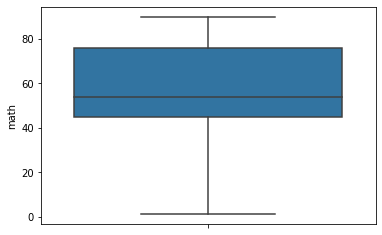

In [11]:
sns.boxplot(data = exam, y = 'math')

In [14]:
pct75 = exam['math'].quantile(0.75)
pct75

75.75

In [15]:
pct25 = exam['math'].quantile(0.25)
pct25

45.0

In [16]:
IQR = pct75 - pct25
IQR

30.75

In [17]:
print(pct75 + 1.5*IQR)
pct25 - 1.5*IQR

121.875


-1.125

In [18]:
pip install pydataset

Note: you may need to restart the kernel to use updated packages.


In [19]:
import pydataset

In [20]:
mpg = pd.read_csv("https://raw.githubusercontent.com/sidsriv/Introduction-to-Data-Science-in-python/master/mpg.csv")
mpg

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [23]:
mpg = mpg.iloc[:, 1:]
mpg[:2]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact


In [24]:
m_pct75 = mpg['cty'].quantile(.75)
m_pct25 = mpg['cty'].quantile(.25)
IQR = m_pct75 - m_pct25

print(m_pct75)
print(m_pct25)
print(IQR)

19.0
14.0
5.0


In [25]:
print(m_pct75 + 1.5*IQR)
m_pct25 -  1.5*IQR

26.5


6.5

In [26]:
m_pct75 = mpg['hwy'].quantile(.75)
m_pct25 = mpg['hwy'].quantile(.25)
IQR = m_pct75 - m_pct25

print(m_pct75)
print(m_pct25)
print(IQR)

27.0
18.0
9.0


In [27]:
print(m_pct75 + 1.5*IQR)
m_pct25 -  1.5*IQR

40.5


4.5

In [28]:
mpg[(mpg['hwy'] >= 40.5) | (mpg['hwy'] <= 4.5)]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [29]:
import numpy as np

In [30]:
mpg[~(mpg['hwy'] >= 40.5) | ~(mpg['hwy'] <= 4.5)].hwy.mean()

23.44017094017094

### 그래프 만들기

#### 1. 산점도

In [31]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


<AxesSubplot:xlabel='displ', ylabel='hwy'>

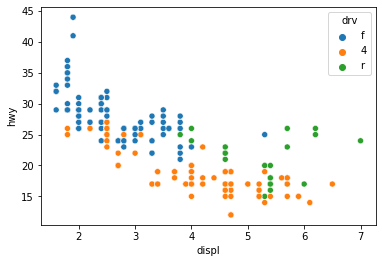

In [32]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv')

[(3.0, 6.0), (10.0, 30.0)]

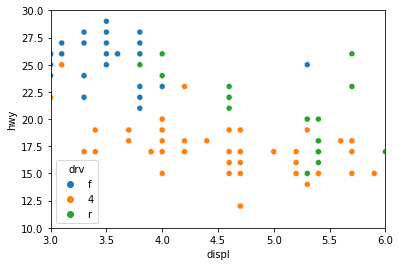

In [33]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv').set(xlim = (3,6), ylim = (10,30))

In [34]:
import matplotlib.pyplot as plt

In [47]:
plt.rcParams.update({'figure.figsize' : [6,3.5]})

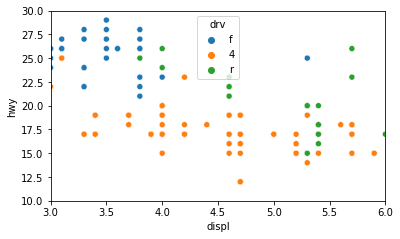

In [49]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv').set(xlim = (3,6), ylim = (10,30))
plt.savefig("test.png", dpi = 300)

#### 2. 막대 그래프

In [51]:
mean_hwy = mpg.groupby('drv', as_index = False)[['hwy']].mean()
mean_hwy

,drv,hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


<AxesSubplot:xlabel='drv', ylabel='hwy'>

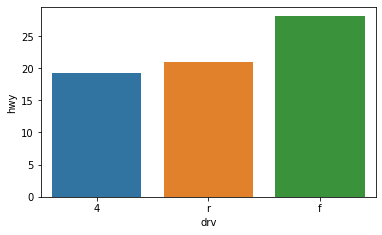

In [56]:
mean_hwy = mean_hwy.sort_values(by = 'hwy')
sns.barplot(data = mean_hwy, x = 'drv', y = 'hwy')

#### 3. 선 그래프

In [57]:
import pydataset

In [58]:
pydataset.data()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001


In [59]:
economics = pydataset.data("economics")
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
1,1967-06-30,507.8,198712,9.8,4.5,2944
2,1967-07-31,510.9,198911,9.8,4.7,2945
3,1967-08-31,516.7,199113,9.0,4.6,2958
4,1967-09-30,513.3,199311,9.8,4.9,3143
5,1967-10-31,518.5,199498,9.7,4.7,3066


<AxesSubplot:xlabel='date', ylabel='unemploy'>

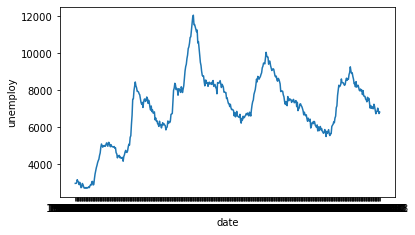

In [61]:
sns.lineplot(data = economics, x = 'date', y = 'unemploy')

In [60]:
economics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 1 to 478
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      478 non-null    object 
 1   pce       478 non-null    float64
 2   pop       478 non-null    int64  
 3   psavert   478 non-null    float64
 4   uempmed   478 non-null    float64
 5   unemploy  478 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 26.1+ KB


In [63]:
economics['unemploy'] = economics['unemploy'].astype('float')
economics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 1 to 478
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      478 non-null    object 
 1   pce       478 non-null    float64
 2   pop       478 non-null    int64  
 3   psavert   478 non-null    float64
 4   uempmed   478 non-null    float64
 5   unemploy  478 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 42.3+ KB


In [64]:
economics['date'] = pd.to_datetime(economics['date'])
economics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 1 to 478
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      478 non-null    datetime64[ns]
 1   pce       478 non-null    float64       
 2   pop       478 non-null    int64         
 3   psavert   478 non-null    float64       
 4   uempmed   478 non-null    float64       
 5   unemploy  478 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 42.3 KB


<AxesSubplot:xlabel='date', ylabel='unemploy'>

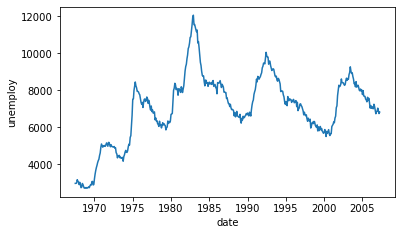

In [65]:
sns.lineplot(data = economics, x = 'date', y = 'unemploy')

#### 4. 상자 그림 만들기

In [68]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


<AxesSubplot:xlabel='drv', ylabel='hwy'>

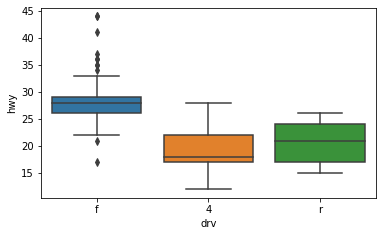

In [69]:
sns.boxplot(data = mpg, x = 'drv', y = 'hwy')

<AxesSubplot:ylabel='hwy'>

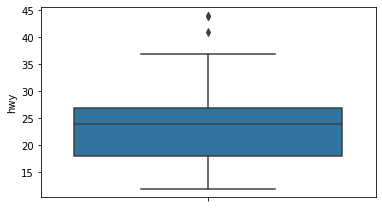

In [70]:
sns.boxplot(data = mpg, y = 'hwy')

### 한국복지패널 데이터 분석

#### 1

In [71]:
pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [72]:
raw_welfare = pd.read_spss("Koweps_hpwc14_2019_beta3.sav")
raw_welfare

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14414,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14415,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,208.0,NaN,0.0,NaN
14416,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,5.0,.,4.0,3.0,3.0,NaN,1200.0,NaN,0.0,NaN


In [73]:
welfare = raw_welfare.loc[:, ['h14_g3','h14_g4','h14_g10','h14_g11','p1402_8aq1','h14_eco9','h14_reg7']]
welfare

,h14_g3,h14_g4,h14_g10,h14_g11,p1402_8aq1,h14_eco9,h14_reg7
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...
14413,2.0,1967.0,1.0,1.0,NaN,NaN,5.0
14414,2.0,1992.0,5.0,1.0,NaN,NaN,5.0
14415,1.0,1995.0,5.0,1.0,NaN,910.0,5.0
14416,2.0,1998.0,5.0,1.0,200.0,246.0,5.0


In [74]:
welfare = welfare.rename(columns = {'h14_g3':'gender', 'h14_g4':'birth', 'h14_g10':'marriage_type',
              'h14_g11':'religion', 'p1402_8aq1':'income',
              'h14_eco9':'code_job', 'h14_reg7':'code_region'})
welfare    

,gender,birth,marriage_type,religion,income,code_job,code_region
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...
14413,2.0,1967.0,1.0,1.0,NaN,NaN,5.0
14414,2.0,1992.0,5.0,1.0,NaN,NaN,5.0
14415,1.0,1995.0,5.0,1.0,NaN,910.0,5.0
14416,2.0,1998.0,5.0,1.0,200.0,246.0,5.0


In [77]:
welfare['gender'].value_counts()

2.0    7912
1.0    6506
Name: gender, dtype: int64

In [80]:
welfare['gender'] = np.where(welfare['gender'] == 1.0, 'male', 'female')
welfare.head()

,gender,birth,marriage_type,religion,income,code_job,code_region
0,female,1945.0,2.0,1.0,NaN,NaN,1.0
1,male,1948.0,2.0,2.0,NaN,NaN,1.0
2,male,1942.0,3.0,1.0,107.0,762.0,1.0
3,male,1962.0,1.0,1.0,192.0,855.0,1.0
4,female,1963.0,1.0,1.0,NaN,NaN,1.0


In [83]:
df = welfare.groupby('gender', as_index = False)[['income']].mean()
df

,gender,income
0,female,186.293096
1,male,349.037571


<AxesSubplot:xlabel='gender', ylabel='income'>

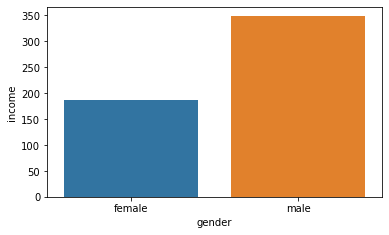

In [84]:
sns.barplot(data = df, x = 'gender', y = 'income')

#### 2

In [85]:
welfare.head()

,gender,birth,marriage_type,religion,income,code_job,code_region
0,female,1945.0,2.0,1.0,NaN,NaN,1.0
1,male,1948.0,2.0,2.0,NaN,NaN,1.0
2,male,1942.0,3.0,1.0,107.0,762.0,1.0
3,male,1962.0,1.0,1.0,192.0,855.0,1.0
4,female,1963.0,1.0,1.0,NaN,NaN,1.0


In [86]:
print(min(welfare['birth']))
print(max(welfare['birth']))

1907.0
2018.0


In [87]:
welfare['age'] = 2019.0 - welfare['birth']
welfare.head()

,gender,birth,marriage_type,religion,income,code_job,code_region,age
0,female,1945.0,2.0,1.0,NaN,NaN,1.0,74.0
1,male,1948.0,2.0,2.0,NaN,NaN,1.0,71.0
2,male,1942.0,3.0,1.0,107.0,762.0,1.0,77.0
3,male,1962.0,1.0,1.0,192.0,855.0,1.0,57.0
4,female,1963.0,1.0,1.0,NaN,NaN,1.0,56.0


In [88]:
welfare['age'] = welfare['age'].astype('int')
welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         14418 non-null  object 
 1   birth          14418 non-null  float64
 2   marriage_type  14418 non-null  float64
 3   religion       14418 non-null  float64
 4   income         4534 non-null   float64
 5   code_job       6878 non-null   float64
 6   code_region    14418 non-null  float64
 7   age            14418 non-null  int32  
dtypes: float64(6), int32(1), object(1)
memory usage: 844.9+ KB


In [89]:
df2 = welfare.groupby('age', as_index = False)[['income']].mean()
df2

,age,income
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
5,6,NaN
6,7,NaN
7,8,NaN
8,9,NaN
9,10,NaN


<AxesSubplot:xlabel='age', ylabel='income'>

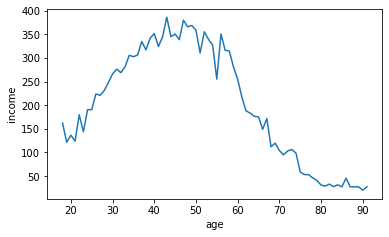

In [91]:
sns.lineplot(data = df2, x = 'age', y = 'income')

#### 3

In [93]:
welfare['age_gen'] = np.where(welfare['age'] <= 30, 'young',
                             np.where(welfare['age'] <= 60, 'middle', 'old'))
welfare.head()

,gender,birth,marriage_type,religion,income,code_job,code_region,age,age_gen
0,female,1945.0,2.0,1.0,NaN,NaN,1.0,74,old
1,male,1948.0,2.0,2.0,NaN,NaN,1.0,71,old
2,male,1942.0,3.0,1.0,107.0,762.0,1.0,77,old
3,male,1962.0,1.0,1.0,192.0,855.0,1.0,57,middle
4,female,1963.0,1.0,1.0,NaN,NaN,1.0,56,middle


In [94]:
welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         14418 non-null  object 
 1   birth          14418 non-null  float64
 2   marriage_type  14418 non-null  float64
 3   religion       14418 non-null  float64
 4   income         4534 non-null   float64
 5   code_job       6878 non-null   float64
 6   code_region    14418 non-null  float64
 7   age            14418 non-null  int32  
 8   age_gen        14418 non-null  object 
dtypes: float64(6), int32(1), object(2)
memory usage: 957.6+ KB


In [95]:
welfare['age_gen'] = welfare['age_gen'].astype('category')
welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   gender         14418 non-null  object  
 1   birth          14418 non-null  float64 
 2   marriage_type  14418 non-null  float64 
 3   religion       14418 non-null  float64 
 4   income         4534 non-null   float64 
 5   code_job       6878 non-null   float64 
 6   code_region    14418 non-null  float64 
 7   age            14418 non-null  int32   
 8   age_gen        14418 non-null  category
dtypes: category(1), float64(6), int32(1), object(1)
memory usage: 859.1+ KB


In [106]:
df3 = welfare.groupby('age_gen', as_index = False)[['income']].mean()
df3

,age_gen,income
0,middle,329.824855
1,old,116.243770
2,young,210.887097


<AxesSubplot:xlabel='age_gen', ylabel='income'>

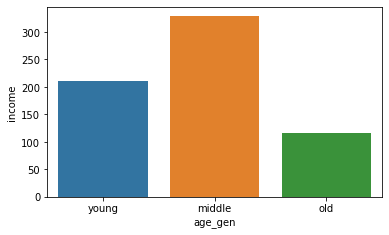

In [107]:
sns.barplot(data = df3, x = 'age_gen', y = 'income', order = ['young', 'middle', 'old'])

In [109]:
df4 = welfare.groupby(['age_gen', 'gender'], as_index = False)[['income']].mean()
df4

,age_gen,gender,income
0,middle,female,226.226646
1,middle,male,413.188540
2,old,female,81.132597
3,old,male,166.415789
4,young,female,198.790404
5,young,male,227.636364


<AxesSubplot:xlabel='age_gen', ylabel='income'>

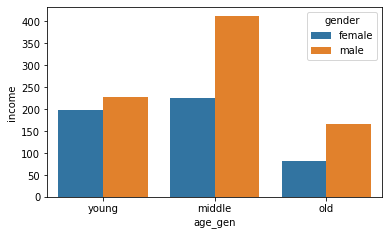

In [110]:
sns.barplot(data = df4, x = 'age_gen', y = 'income', order = ['young', 'middle', 'old'], hue = 'gender')

### 텍스트 마이닝

In [111]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [112]:
moon = open("speech_moon.txt", 'r', encoding = 'utf-8').read()
moon

'정권교체 하겠습니다!\n  정치교체 하겠습니다!\n  시대교체 하겠습니다!\n  \n  ‘불비불명(不飛不鳴)’이라는 고사가 있습니다. 남쪽 언덕 나뭇가지에 앉아, 3년 동안 날지도 울지도 않는 새. 그러나 그 새는 한번 날면 하늘 끝까지 날고, 한번 울면 천지를 뒤흔듭니다.\n\n그 동안 정치와 거리를 둬 왔습니다. 그러나 암울한 시대가 저를 정치로 불러냈습니다. 더 이상 남쪽 나뭇가지에 머무를 수 없었습니다. 이제 저는 국민과 함께 높이 날고 크게 울겠습니다. 오늘 저는 제18대 대통령선거 출마를 국민 앞에 엄숙히 선언합니다.\n\n\n‘우리나라 대통령’이 되겠습니다.\n\n\n존경하는 국민 여러분!\n  \n  저는 대통령이 되겠습니다. 우리나라 대통령이 되겠습니다. 소수 특권층의 나라가 아니라 보통사람들이 주인인 ‘우리나라’, 네 편 내 편 편가르지 않고 함께 가는 우리나라, ‘우리’라는 말이 조금도 부끄럽지 않은, 진정한 ‘우리나라’의 대통령이 되겠습니다.\n\n지금까지 우리 보통사람들은 날지도 울지도 못하는 새였습니다. 나라의 주인으로 행세하지 못했고, 주인으로 대접받지 못했습니다. 나서서 말도 하지 못했습니다. 이제 몸을 일으켜 날아야 합니다. 당당하게 말하고 정치에 참여해야 합니다.\n\n제가 추구하는 ‘우리나라’는 정치인에게 맡겨놓는 나라가 아니라 시민이 직접 정치와 정책과정에 참여하는 나라입니다. 저는 시민과 동행하는 정치를 하고 싶습니다. 제가 추구하는 ‘우리나라’는 특권과 불평등의 나라가 아니라, 보통사람들이 함께 기회를 가지는 공평하고 정의로운 나라입니다.\n\n이제 권력과 돈을 가진 집단이 나라를 그들 마음대로 움직이던 시대는 끝났습니다. 힘없는 사람들에게 끝없이 희생을 강요하던 낡은 경제, 낡은 정치, 낡은 권력도 모두 끝났습니다. 오늘 저 문재인은 우리나라를 우리 모두의 나라로 선언합니다.\n\n국민이 모두 아픕니다.\n\n제가 높이 날고 크게 울겠다고 결심한 이유는 보통사람들의 삶이 너무 고달프고, 우리가 처한 현실이 너무도 엄중

In [113]:
import re

In [114]:
p = re.compile("[^가-힣]")
p.sub("  ", moon)

'정권교체  하겠습니다        정치교체  하겠습니다        시대교체  하겠습니다                불비불명              이라는  고사가  있습니다    남쪽  언덕  나뭇가지에  앉아      년  동안  날지도  울지도  않는  새    그러나  그  새는  한번  날면  하늘  끝까지  날고    한번  울면  천지를  뒤흔듭니다      그  동안  정치와  거리를  둬  왔습니다    그러나  암울한  시대가  저를  정치로  불러냈습니다    더  이상  남쪽  나뭇가지에  머무를  수  없었습니다    이제  저는  국민과  함께  높이  날고  크게  울겠습니다    오늘  저는  제    대  대통령선거  출마를  국민  앞에  엄숙히  선언합니다          우리나라  대통령  이  되겠습니다        존경하는  국민  여러분              저는  대통령이  되겠습니다    우리나라  대통령이  되겠습니다    소수  특권층의  나라가  아니라  보통사람들이  주인인    우리나라      네  편  내  편  편가르지  않고  함께  가는  우리나라      우리  라는  말이  조금도  부끄럽지  않은    진정한    우리나라  의  대통령이  되겠습니다      지금까지  우리  보통사람들은  날지도  울지도  못하는  새였습니다    나라의  주인으로  행세하지  못했고    주인으로  대접받지  못했습니다    나서서  말도  하지  못했습니다    이제  몸을  일으켜  날아야  합니다    당당하게  말하고  정치에  참여해야  합니다      제가  추구하는    우리나라  는  정치인에게  맡겨놓는  나라가  아니라  시민이  직접  정치와  정책과정에  참여하는  나라입니다    저는  시민과  동행하는  정치를  하고  싶습니다    제가  추구하는    우리나라  는  특권과  불평등의  나라가  아니라    보통사람들이  함께  기회를  가지는  공평하고  정의로운  나라입

In [115]:
moon = p.sub("  ", moon)

In [116]:
import konlpy

In [118]:
hannanum = konlpy.tag.Hannanum()

In [119]:
nouns = hannanum.nouns(moon)
nouns

['정권교체',
 '정치교체',
 '시대교체',
 '불비불명',
 '고사',
 '남쪽',
 '언덕',
 '나뭇가지',
 '년',
 '동안',
 '새',
 '한번',
 '하늘',
 '끝',
 '한번',
 '천지',
 '동안',
 '정치',
 '거리',
 '암울한',
 '시대',
 '저',
 '정치',
 '이상',
 '남쪽',
 '나뭇가지',
 '수',
 '저',
 '국민',
 '오늘',
 '저',
 '저',
 '대',
 '대통령선거',
 '출마',
 '국민',
 '앞',
 '선언',
 '우리나라',
 '대통령',
 '존경',
 '국민',
 '여러분',
 '저',
 '대통령',
 '우리나라',
 '대통령',
 '소수',
 '특권층',
 '나라',
 '보통사람들',
 '주인',
 '우리나라',
 '네',
 '편',
 '내',
 '편',
 '편가르지',
 '우리나라',
 '우리',
 '라',
 '말',
 '진정한',
 '우리나라',
 '의',
 '대통령',
 '지금',
 '우리',
 '보통사람들',
 '새',
 '나라',
 '주인',
 '행세',
 '주인',
 '대접',
 '말',
 '몸',
 '당당',
 '말',
 '정치',
 '참여',
 '저',
 '추구',
 '우리나라',
 '정치인',
 '나라',
 '시민',
 '정치',
 '정책과정',
 '참여',
 '나라',
 '저',
 '시민',
 '동행',
 '정치',
 '저',
 '추구',
 '우리나라',
 '특권',
 '불평등',
 '나라',
 '보통사람들',
 '기회',
 '공평',
 '정의로운',
 '나라',
 '권력',
 '돈',
 '집단',
 '나라',
 '그들',
 '마음',
 '시대',
 '사람들',
 '희생',
 '강요',
 '경제',
 '정치',
 '권력',
 '오늘',
 '문재인',
 '우리나라',
 '우리',
 '모두',
 '나라',
 '선언',
 '국민',
 '저',
 '결심',
 '이유',
 '보통사람들',
 '삶',
 '우리',
 '현실',
 '엄중하기',
 '때문',
 '근본적',
 '혁신'

In [141]:
df5 = pd.DataFrame(nouns)
df5

,0
0,정권교체
1,정치교체
2,시대교체
3,불비불명
4,고사
...,...
1408,모두
1409,주인
1410,진정한
1411,우리나라


In [142]:
df5.iloc[:,0].str.len()

0       4
1       4
2       4
3       4
4       2
       ..
1408    2
1409    2
1410    3
1411    4
1412    3
Name: 0, Length: 1413, dtype: int64

In [143]:
df5['count'] = df5.iloc[:,0].str.len()
df5.head()

,0,count
0,정권교체,4
1,정치교체,4
2,시대교체,4
3,불비불명,4
4,고사,2


In [144]:
df5.rename({0 : 'word'}, axis = 1, inplace = True)
df5.head()

,word,count
0,정권교체,4
1,정치교체,4
2,시대교체,4
3,불비불명,4
4,고사,2


In [145]:
df5 = df5[df5['count'] >= 2]
df5

,word,count
0,정권교체,4
1,정치교체,4
2,시대교체,4
3,불비불명,4
4,고사,2
...,...,...
1408,모두,2
1409,주인,2
1410,진정한,3
1411,우리나라,4


In [146]:
top20 = df5.groupby('word', as_index = False).agg('count').sort_values('count', ascending = False)

<AxesSubplot:xlabel='word', ylabel='count'>

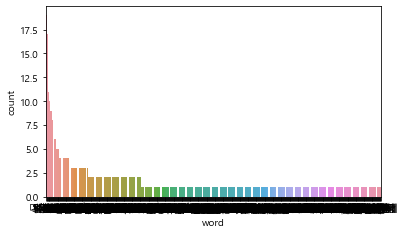

In [147]:
sns.barplot(data = top20, x = 'word', y = 'count')

In [137]:
import matplotlib.pyplot as plt

In [139]:
plt.rcParams['font.family'] = 'Malgun Gothic'

<AxesSubplot:xlabel='word', ylabel='count'>

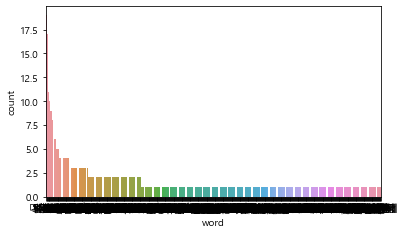

In [140]:
sns.barplot(data = top20, x = 'word', y = 'count')